## Dataset 
* 抽象类，通过继承Dataset类来自定义数据集的格式、大小和其他属性，后续供DataLoader使用
`__init__()`  
`__len__()`返回数据集大小   
`__getitem__()`索引数据集中的某一个数据  


In [1]:
import torch
from torch.utils.data import Dataset 
class MyDataset(Dataset):
    def __init__(self, data_tensor, target_tensor):
        self.data_tensor = data_tensor
        self.target_tensor = target_tensor
    def __len__(self):
        return self.data_tensor.size(0)
    # 返回索引的数据和标签
    def __getitem__(self, index):
        return self.data_tensor[index], self.target_tensor[index]

In [6]:
data_tensor = torch.randn(10,3)
target_tensor = torch.randint(2, (10,))

my_dataset = MyDataset(data_tensor, target_tensor)

print('size {0}  tensor_data[0]: {1}'. format(len(my_dataset), my_dataset[0]))

size 10  tensor_data[0]: (tensor([0.3908, 0.3197, 2.0827]), tensor(0))


## DataLoader
* 多进程，迭代加载数据

In [18]:
from torch.utils.data import DataLoader
tensor_dataloader = DataLoader(dataset=my_dataset, batch_size=2, shuffle=True, num_workers=0)

for data, target in tensor_dataloader:
    print(data,  target)

print('one batch tensor data', iter(tensor_dataloader).next())

tensor([[ 1.1765, -1.5194, -0.7048],
        [ 1.3312,  0.2973,  1.9023]]) tensor([1, 1])
tensor([[-1.8298, -0.4955,  0.2432],
        [ 1.4904,  0.5578,  1.9221]]) tensor([0, 1])
tensor([[ 0.5840,  0.8794, -0.3481],
        [ 0.3908,  0.3197,  2.0827]]) tensor([0, 0])
tensor([[-0.7436, -0.3800, -0.4981],
        [ 1.2824, -1.3705, -0.9783]]) tensor([0, 0])
tensor([[-0.6984, -0.9136,  1.3491],
        [-1.9296,  0.5205,  0.5659]]) tensor([1, 0])
one batch tensor data [tensor([[ 0.3908,  0.3197,  2.0827],
        [-0.6984, -0.9136,  1.3491]]), tensor([0, 1])]


## torchvision 
* https://pytorch.org/vision/stable/datasets.html 支持的数据集
* 自定义`torchvision.datasets.ImageFolder`实现自定义数据的读取

In [3]:
import torch 
import torchvision
mnist_dataset = torchvision.datasets.MNIST(root='~/.project/dataset', train=True, transform=None, target_transform=None, download=True)
# transform 对数据进行的预处理操作，比如数据增强、归一化、旋转或缩放
# target_transform 用于对图形标签进行预处理操作


In [5]:
mnist_dataset_list = list(mnist_dataset)
print(type(mnist_dataset_list))
display(mnist_dataset_list[0][0])

<class 'list'>


### torchvision.transforms 数据增强

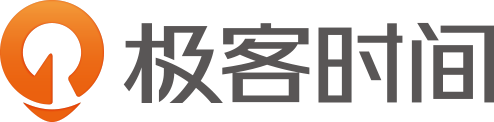

<class 'PIL.WebPImagePlugin.WebPImageFile'>
<class 'torch.Tensor'>
<class 'PIL.Image.Image'>


In [9]:
# 数据类型转换

from PIL import Image
from torchvision import transforms


img=Image.open("./images/logo.jpg")
display(img)
print(type(img))

## PIL.Image -- Tensor
img1 = transforms.ToTensor()(img)
print(type(img1))

img2 = transforms.ToPILImage()(img1)
print(type(img2))

/home/bliss/.conda/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


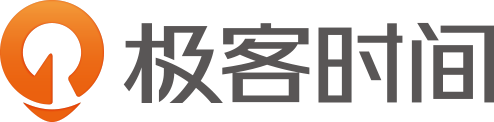

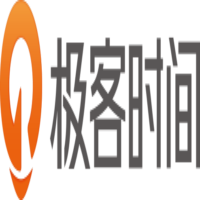

In [10]:
## 变换
# torchvision.transforms.Resize(size, interpolation=2)
## size 为元祖(h,w)时，图形输出尺寸将与之匹配，如果size为int类型整数，较短边将匹配该整数，长边比例缩放

from PIL import Image
from torchvision import transforms

resize_img_oper = transforms.Resize((200,200),interpolation=2)

ori_img = Image.open('./images/logo.jpg')
display(ori_img)

img = resize_img_oper(ori_img)
display(img)

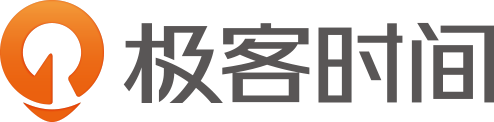

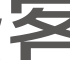

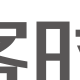

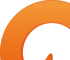

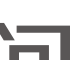

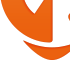

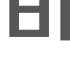

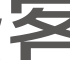

In [12]:
## 剪裁
## torchvision.transforms.CenterCrop(size)
## size = (h,w)时，剪裁后尺寸与之匹配，如果为int时，裁剪后为(int ,int)大小

## torchvision.transforms.RandomCrop(size, padding=none)

##torchvision.transforms.FiveCrop(size)


from dis import dis
from PIL import Image
from torchvision import transforms

center_crop_oper = transforms.CenterCrop((60,70))
random_crop_oper = transforms.RandomCrop((80,80))
five_crop_oper = transforms.FiveCrop((60,70))

ori_img = Image.open('./images/logo.jpg')
display(ori_img)

img1 = center_crop_oper(ori_img)
display(img1)

img2 = random_crop_oper(ori_img)
display(img2)

img3s = five_crop_oper(ori_img)
for img3 in img3s:
    display(img3)

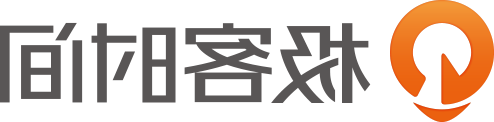

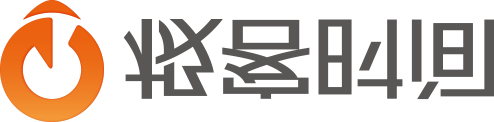

In [13]:
## 翻转
### torchvision.transforms.RandomHorizontalFlip(p=0.5)
# 以概率p随机水平翻转图像
### torchvision.transforms.RandomVerticalFlip(p=0.5)
# 以概率p随机垂直翻转图像

from PIL import Image
from torchvision import transforms

h_flip_oper = transforms.RandomHorizontalFlip(p=1)
v_flip_oper = transforms.RandomVerticalFlip(p=1)

ori_img = Image.open('./images/logo.jpg')

img1 = h_flip_oper(ori_img)
display(img1)

img2=v_flip_oper(ori_img)
display(img2)

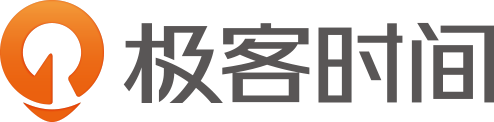

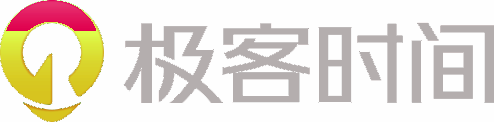

In [15]:
# 只对tensor进行变换
## 标准化，每一个数据点减去所在通道的平均值，再除以通道的标准差



from PIL import Image
from torchvision import transforms 

# 定义标准化操作
norm_oper = transforms.Normalize((0.5, 0.5, 0.5,0.5), (0.5, 0.5, 0.5,0.5))

# 原图
orig_img = Image.open('./images/logo.jpg') 
display(orig_img)

# 图像转化为Tensor
img_tensor = transforms.ToTensor()(orig_img)

# 标准化
tensor_norm = norm_oper(img_tensor)

# Tensor转化为图像
img_norm = transforms.ToPILImage()(tensor_norm)
display(img_norm)

In [ ]:
## 变换的组合
#torchvision.transforms.Compose(transforms)


from PIL import Image
from torchvision import transforms 

# 原图
orig_img = Image.open('./images/logo.jpg') 
display(orig_img)

# 定义组合操作
composed = transforms.Compose([transforms.Resize((200, 200)),
                               transforms.RandomCrop(80)])

# 组合操作后的图
img = composed(orig_img)
display(img)